# Generalized Quantum Signal Processing

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GeneralizedQSP`
Applies a QSP polynomial $P$ to a unitary $U$ to obtain a block-encoding of $P(U)$.

Given a unitary $U$ and a QSP polynomial $P$ (and its complementary polynomial $Q$),
this gate implements the following unitary:

$$
    \begin{bmatrix} P(U) & \cdot \\ Q(U) & \cdot \end{bmatrix}
$$

The polynomials $P$ and $Q$ should satisfy:

$$
    \left|P(e^{i \theta})\right|^2 + \left|Q(e^{i \theta})\right|^2 = 1 ~~\text{for every}~ \theta \in \mathbb{R}
$$

The polynomial $P$ is said to be a QSP Polynomial if it satisfies:

$$
    \left|P(e^{i \theta})\right|^2 \le 1 ~~\text{for every}~ \theta \in \mathbb{R}
$$

If only the QSP polynomial $P$ is known, one can simply call
`GeneralizedQSP.from_qsp_polynomial(U, P)` which automatically computes $Q$.

### Using Laurent Polynomials
To apply GQSP with the transformation given by $P'$

$$
P(z) = \sum_{n = -a}^b p_n z^n
$$

where $a, b \ge 0$, we can simply invoke GQSP with the standard polynomial $P'(z) = z^a P(z)$
which has degree $a + b$, and pass `negative_power=a`.

Given complementary QSP polynomials $P', Q'$ and `negative_power=a`,
this gate implements the unitary transform:

$$
    \begin{bmatrix} U^{-a} P'(U) & \cdot \\ U^{-a} Q'(U) & \cdot \end{bmatrix}
$$


The exact circuit implemented by this gate is described in Figure 2.

#### Parameters
 - `U`: Unitary operation.
 - `P`: Co-efficients of a complex QSP polynomial.
 - `Q`: Co-efficients of a complex QSP polynomial.
 - `negative_power`: value of $k$, which effectively applies $z^{-k} P(z)$. defaults to 0. 

#### References
 - [Generalized Quantum Signal Processing](https://arxiv.org/abs/2308.01501). Motlagh and Wiebe. (2023). Theorem 3; Figure 2; Theorem 6.


In [2]:
from qualtran.bloqs.qsp.generalized_qsp import GeneralizedQSP

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import XPowGate

gqsp = GeneralizedQSP.from_qsp_polynomial(XPowGate(), (0.5, 0.5))

In [4]:
from qualtran.bloqs.basic_gates import XPowGate

gqsp_with_negative_power = GeneralizedQSP.from_qsp_polynomial(
    XPowGate(), (0.5, 0, 0.5), negative_power=1
)

In [5]:
from qualtran.bloqs.basic_gates import XPowGate

gqsp_with_large_negative_power = GeneralizedQSP.from_qsp_polynomial(
    XPowGate(), (0.5, 0, 0.5), negative_power=5
)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([gqsp, gqsp_with_negative_power, gqsp_with_large_negative_power],
           ['`gqsp`', '`gqsp_with_negative_power`', '`gqsp_with_large_negative_power`'])

### Call Graph

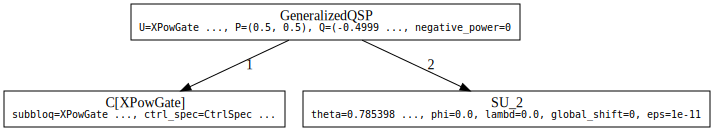

#### Counts totals:
 - `C[X]`: 1
 - `SU2RotationGate(theta=0.7853981633974483, phi=0.0, lambd=0.0, global_shift=0, eps=1e-11)`: 2

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
gqsp_g, gqsp_sigma = gqsp.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gqsp_g)
show_counts_sigma(gqsp_sigma)